In [39]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

###data pre-processing and visualisation

Text(0.5, 1.0, 'make_circle data')

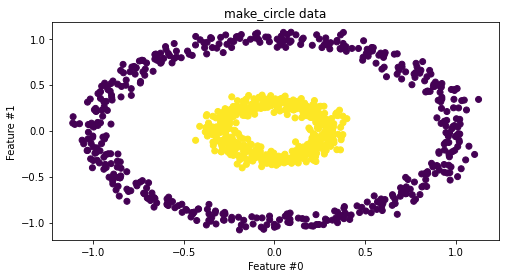

In [2]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)

_, ax = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(8, 4))

ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set_ylabel("Feature #1")
ax.set_xlabel("Feature #0")
ax.set_title("make_circle data")

In [3]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

### functions for plots

In [7]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [26]:
def plot_acc_loss(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

### First model
simple NN without activation function

In [43]:
# create model
model_1 = Sequential()
model_1.add(Dense(50, input_dim=2))
model_1.add(Dense(20))
model_1.add(Dense(1))

In [44]:
# Compile model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
# Fit the model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

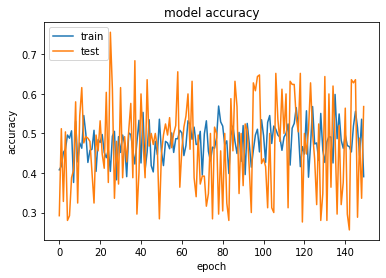

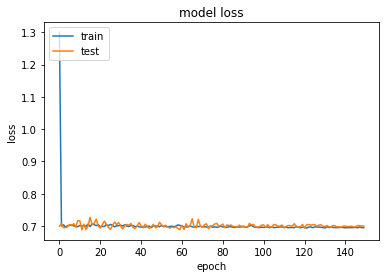

In [46]:
plot_acc_loss(history)

doing binary classification...


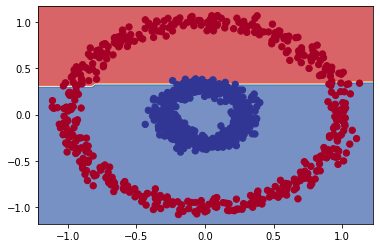

In [15]:
plot_decision_boundary(model_1, X, y)

### Second model
Linear activation function added to previous model

In [56]:
# create model
model_2 = Sequential()
model_2.add(Dense(50, input_dim=2, activation = 'linear'))
model_2.add(Dense(20, activation = 'linear'))
model_2.add(Dense(1, activation = 'linear'))

In [57]:
# Compile model
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

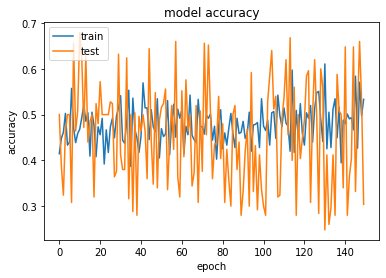

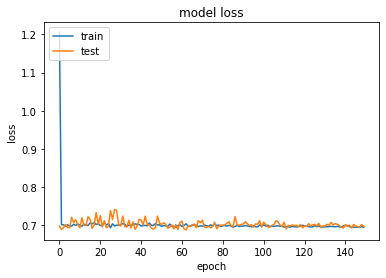

In [58]:
plot_acc_loss(history_2)

doing binary classification...


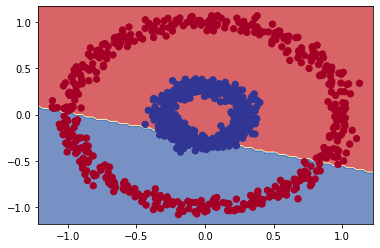

In [60]:
plot_decision_boundary(model_2, X, y)

### Third model
Using **MeanAbsoluteError** as loss function

In [61]:
# create model
model_3 = Sequential()
model_3.add(Dense(50, input_dim=2, activation = 'linear'))
model_3.add(Dense(20, activation = 'linear'))
model_3.add(Dense(1, activation = 'linear'))

In [62]:
# Compile model
model_3.compile(loss = keras.losses.mae, optimizer='adam', metrics=['accuracy'])
# Fit the model
history_3 = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

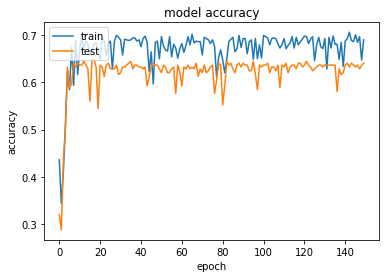

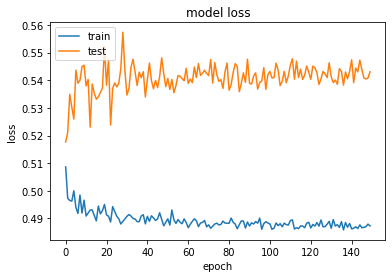

In [63]:
plot_acc_loss(history_3)

doing binary classification...


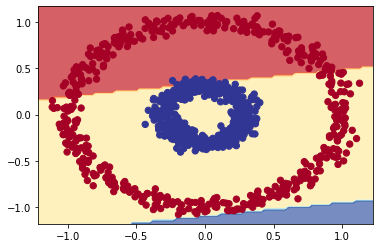

In [64]:
plot_decision_boundary(model_3, X, y)

### Forth model
One layer neural network

In [31]:
# create model
model_4 = Sequential()
model_4.add(Dense(30, input_dim=2, activation = 'linear'))
model_4.add(Dense(1, activation = 'linear'))

In [32]:
# Compile model
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history_4 = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

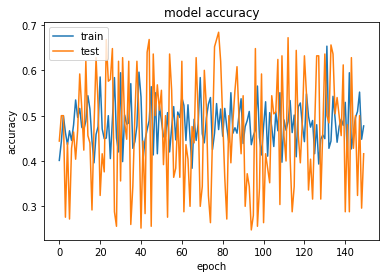

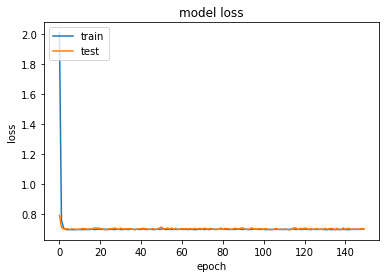

In [33]:
plot_acc_loss(history_4)

doing binary classification...


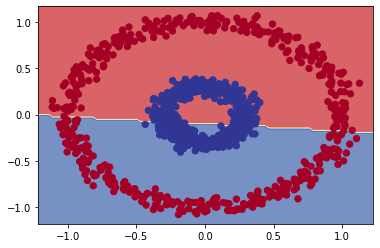

In [34]:
plot_decision_boundary(model_4, X, y)

### Fifth model
tunning learning rate 

**Learning rate = 1**

In [76]:
# create model
model_5_1 = Sequential()
model_5_1.add(Dense(4, input_dim=2, activation = 'relu'))
model_5_1.add(Dense(4, activation = 'relu'))
model_5_1.add(Dense(1, activation = 'sigmoid'))
# Compile model
model_5_1.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=1), metrics=['accuracy'])
# Fit the model
history_5_1 = model_5_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

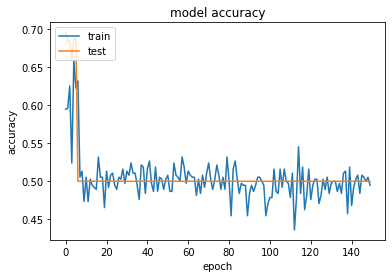

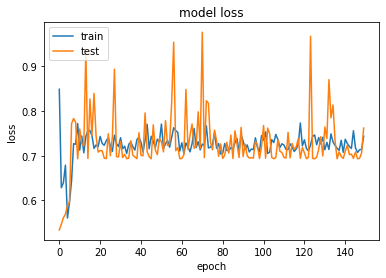

In [77]:
plot_acc_loss(history_5_1)

**Learning rate = 0.1**

In [82]:
# create model
model_5_2 = Sequential()
model_5_2.add(Dense(4, input_dim=2, activation = 'relu'))
model_5_2.add(Dense(4, activation = 'relu'))
model_5_2.add(Dense(1, activation = 'sigmoid'))
# Compile model
model_5_2.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
# Fit the model
history_5_2 = model_5_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

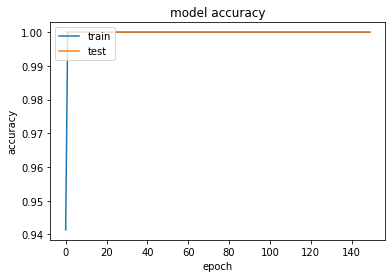

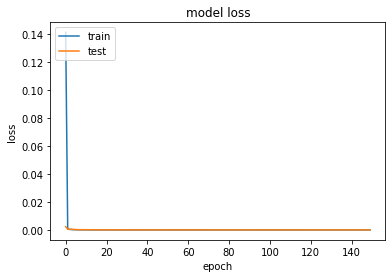

In [83]:
plot_acc_loss(history_5_2)

doing binary classification...


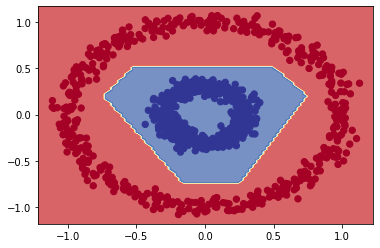

In [84]:
plot_decision_boundary(model_5_2, X, y)

### Last model
try to find a network that works well on classifying data

In [35]:
# create model
model_6 = Sequential()
model_6.add(Dense(4, input_dim=2, activation = 'relu'))
model_6.add(Dense(4, activation = 'relu'))
model_6.add(Dense(1, activation = 'sigmoid'))

In [40]:
# Compile model
model_6.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# Fit the model
history_6 = model_6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=10, verbose=0)

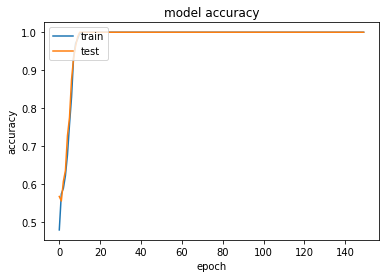

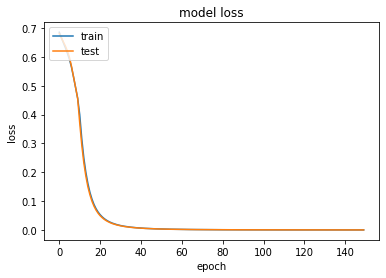

In [41]:
plot_acc_loss(history_6)

doing binary classification...


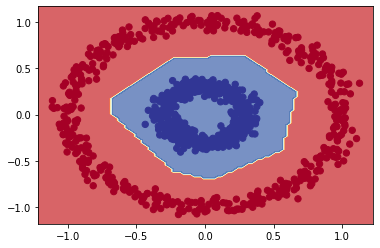

In [42]:
plot_decision_boundary(model_6, X, y)